# **Group 8 Project - User Knowledge Modeling Data Set**
Authors: Minting Fu, Zeti Batrisha Jamiluddin Amini, Liz Ji, Caroline Zhang

## Introduction

In this project, we will study a dataset of 403 real user knowledge status in the area of Electrical DC Machines to understand how the user knowledge level is determined. Good academic performances are pursued both by students and educational institutions. In order to find a more efficient way to study and gain better academic scores, we need to further explore and analyze the User Knowledge dataset, which can be found <a href = "https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling" target = "_blank">here</a>.

We would like to investigate this question through our project:

* Is there a relationship between STG, SCG, STR, LPR, PEG and UNS? (ie. Which of STG, SCG, STR, LPR, PEG are contributing factors to UNS and how can we predict UNS better?)

We will be looking at 5 different variables to predict the knowledge level of users (UNS). These variables are:

* STG : the degree of study time for goal object materails.
* SCG : the degree of repetition number of user for goal object materails.
* STR : the degree of study time of user for related objects with goal object.
* LPR : the exam performance of user for related objects with goal object.
* PEG : the exam performance of user for goal objects.

## Methods

The first thing we do is to import the pacakges we are going to use for the entire project.

In [32]:
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

In [33]:
#Using the set.seed function to make sure our code is reproducible
set.seed(12)

We will download and read the dataset. Since the dataset has been seperated into training and testing data ahead, we will read two datasets seperatedly as `training_data` and `testing_data`. 

In [34]:
# download the file from the website
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls'
download.file(url, destfile='data/user_knowledge_data.xls')

# read the dataset
training_data <- read_excel('data/user_knowledge_data.xls', sheet=2, range='A1:F259')           
print("Training Data")
training_data

testing_data <- read_excel('data/user_knowledge_data.xls', sheet=3, range='A1:F146')
print("Testing Data")
testing_data

[1] "Training Data"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


[1] "Testing Data"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


**As we can see from the two datasets above, they are almost clean. There are few things we do to clean the data:**

    1. Our target variable UNS is in chr type, so We need to change the type of the UNS variable to factor type in order to do further analysis. 
    2. We notice that the labels of UNS in training set are different from those in testing set. They are lower case letter with underscores in the training set, whereas they are all upper case letter in the testing set. 
    3. We will check whether there are missing data in two datasets.

In [41]:
# clean the training and testing data, and making sure that the target variable, UNS, is a factor type

# unite value format
training_data$UNS = tolower(training_data$UNS)
training_data <- training_data %>%
                 mutate(UNS = as_factor(UNS))
print("Training Data")
training_data

testing_data$UNS = tolower(testing_data$UNS)
testing_data <- testing_data %>%
    mutate(UNS = str_replace(UNS, " ", "_")) %>%
    mutate(UNS = as_factor(UNS))
print("Testing Data")
testing_data


# test missing values

sprintf("The number of missing data in training data: %s", sum(is.na(training_data)))
sprintf("The number of missing data in testing data: %s", sum(is.na(testing_data)))

[1] "Training Data"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,high
0.06,0.06,0.05,0.25,0.33,low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,high
0.50,0.75,0.81,0.61,0.26,middle
0.66,0.90,0.76,0.87,0.74,high


[1] "Testing Data"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,very_low
0.05,0.05,0.55,0.60,0.14,low
0.08,0.18,0.63,0.60,0.85,high
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,low
0.66,0.68,0.81,0.57,0.57,middle
0.68,0.64,0.79,0.97,0.24,middle


[1] "The number of missing data in training data: 0"

[1] "The number of missing data in testing data: 0"

**There are no missing values in our training and testing datasets.**

**And now we can see from each table above:**

    1. each row is a single observation
    2. each column is a single variable 
    3. each value is a single cell
**Therefore, the training set and testing set are clean and tidy now.**

**We also notice that `the proportion of the training_data is around 64%`, and `the proportion of the test data is around 36%` from calculation.**

### Summarization

Now we are going to summarize the training dataset information.

In [36]:
# summarise the maximum value of each predictors
training_data_max <- training_data %>%
                     select(-UNS) %>%
                     map_df(max)
print("The maximum value of each predictors")
training_data_max

# summarise the minimum value of each predictors
training_data_min <- training_data %>%
                     select(-UNS) %>%
                     map_df(min)
print("The minimum value of each predictors")
training_data_min

# summarise the average value of each predictors
training_data_avg <- training_data %>%
                     select(-UNS) %>%
                     map_df(mean)
print("The average value of each predictors")
training_data_avg

[1] "The maximum value of each predictors"


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.99,0.9,0.95,0.99,0.93


[1] "The minimum value of each predictors"


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0


[1] "The average value of each predictors"


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


**According to the tables above, we can see the range of each variable is :**
* The range of STG, the degree of study time for goal object materails, is [0, 0.99].
* The range of SCG, the degree of repetition number of user for goal object materails, is [0, 0.9].
* The range of STR, the degree of study time of user for related objects with goal object, is [0, 0.95].
* The range of LPR, the exam performance of user for related objects with goal object, is [0, 0.99].
* The range of PEG, the exam performance of user for goal objects, is [0, 0.93].

**Now, we have some basic ideas about our dataset. In the next step, We want to know which factor(s) is related to our target variable (UNS), in other words, which factor is our explanatory variable. To do this, we need to visualize our data to find out if there is a relationship between STG, SCG, STR, LPR, PEG and UNS.**

### Data Visualization
To visualize the data, we will use the `ggpairs` function, which returns a matrix of plots for a given dataset. Since we have 5 potential explanatory variables and 1 target variable, it is better to compare the distibution and evaluate the association of them in a whole. The `ggpairs` function provides an efficient way to exploring the distribution and correlation between different quantitative variables and categorical variables.

The `columns` argument is used to select the number of columns we want to include in the plot. In this case, we need to put `1:5` here since we have 5 prediction variables in total. 

We also need to change the font size of correlation values in order to make it fit in the panel and readable. To change the font size, we need to include `upper = list(continuous = wrap('cor', size = ...)` in our `ggpairs` function.

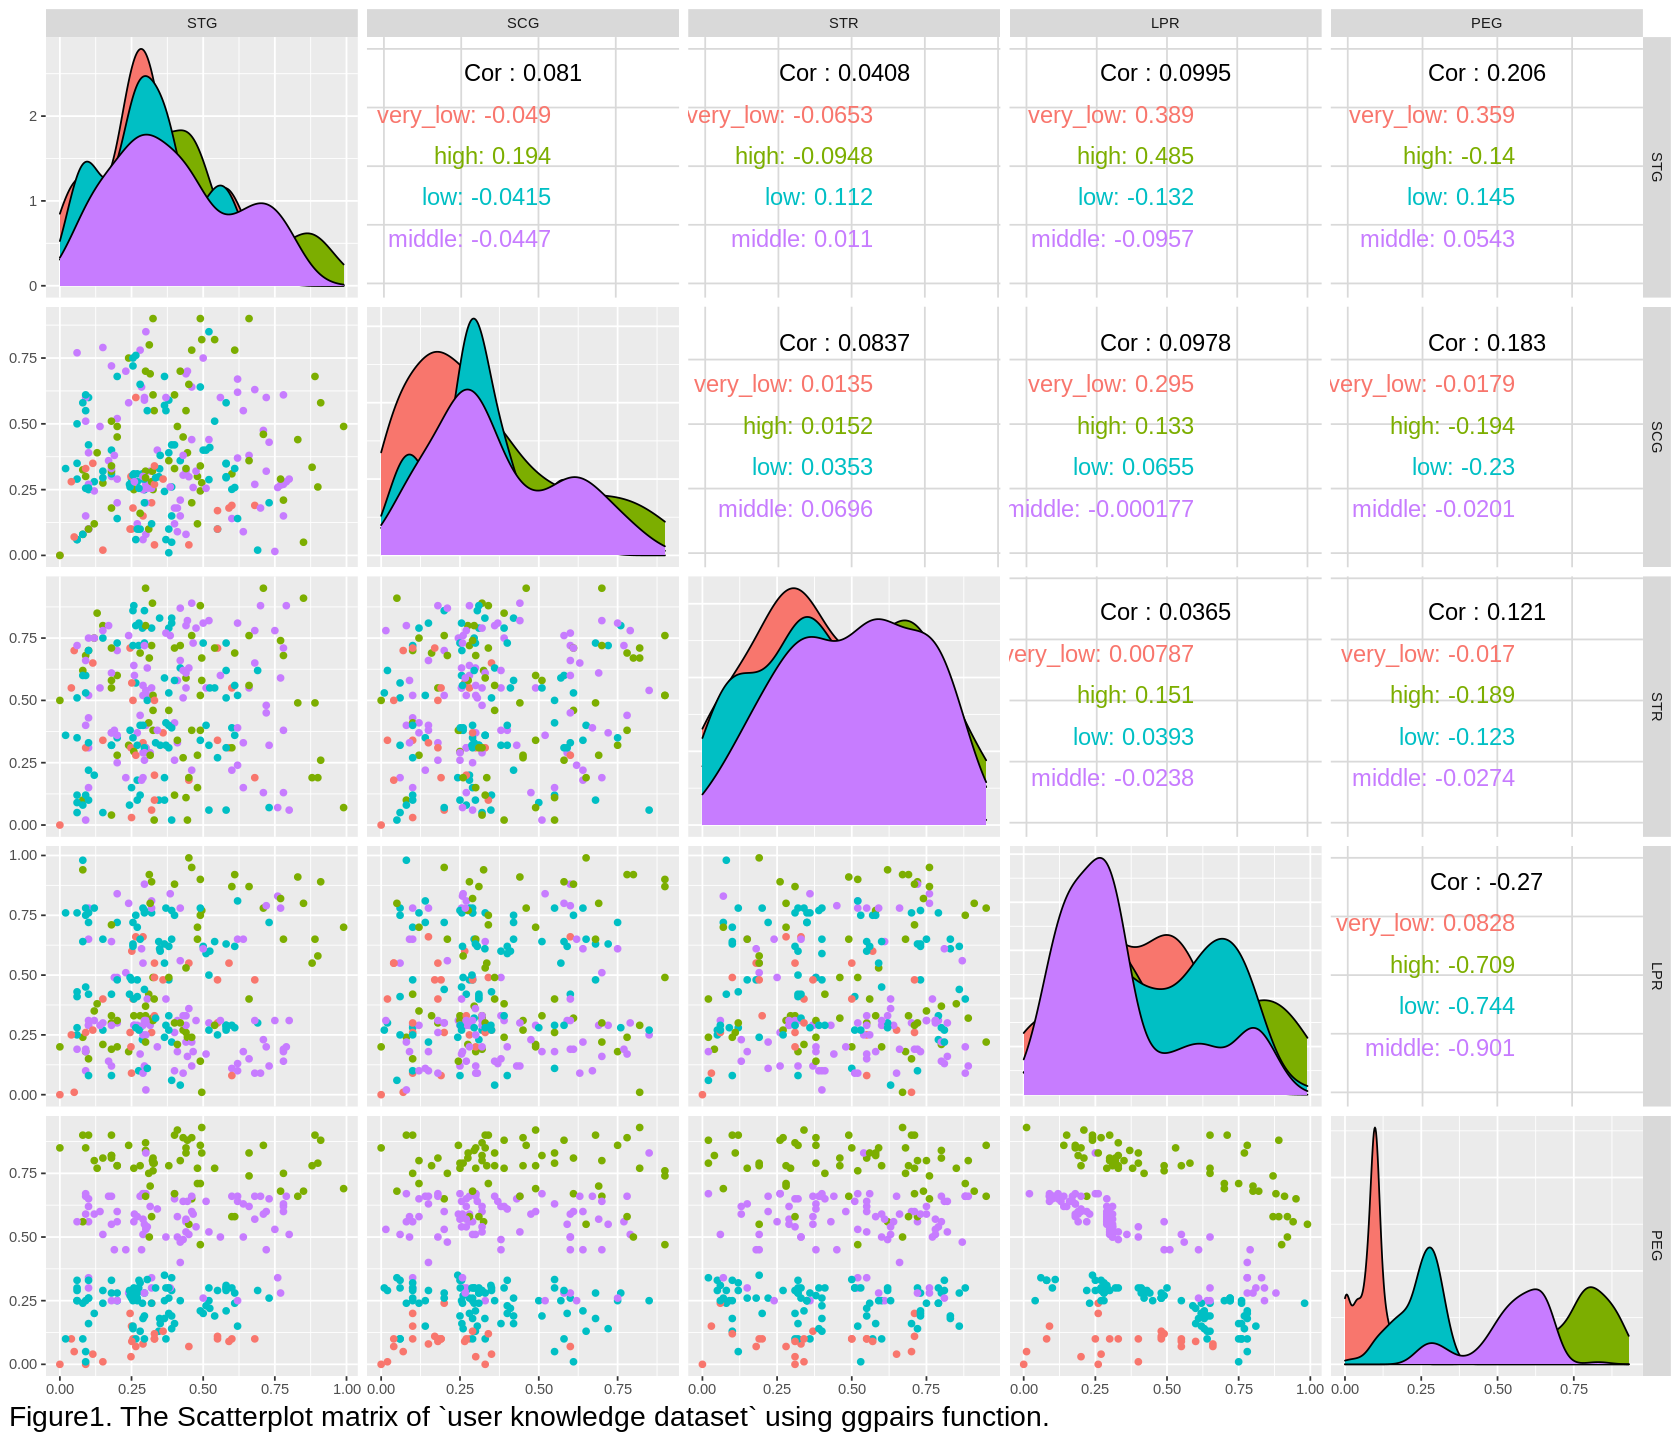

In [37]:
options(repr.plot.width = 14, repr.plot.height = 12)
relationship_plot <- ggpairs(training_data, columns = 1:5, 
                             ggplot2 :: aes(color = UNS), 
                             upper = list(continuous = wrap('cor', size = 5))) +
                             labs(caption = "Figure1. The Scatterplot matrix of `user knowledge dataset` using ggpairs function.") +
                             theme(plot.caption.position = "plot", plot.caption = element_text(size = 17, hjust =0))
relationship_plot

**By default, the upper panel shows the `correlation coefficient` between quantitative variables. The diagnal shows the `density plot` of quantitative variables. The lower panel shows the `scatterplot` between 2 quantitative variables.**

**Recall from previous information, we have 6 variables in this user knowledge dataset, they are:**

* STG : the degree of study time for goal object materails. (Quantitative variable)
* SCG : the degree of repetition number of user for goal object materails. (Quantitative variable)
* STR : the degree of study time of user for related objects with goal object. (Quantitative variable)
* LPR : the exam performance of user for related objects with goal object. (Quantitative variable)
* PEG : the exam performance of user for goal objects. (Quantitative variable)
* UNS : the knowledge level of users.(Categorical variable)


**As the Figure1 shown above, we first look at the density plot for each quantitative variable. The density plots show a distribution of each quantitative variable. Among all of them, we can see there are 4 distinct coloring groups and less overlapping area on the density plot of PEG rearding to UNS. This indicates that PEG may be a good predictor for UNS.**

**Then, we look at the correlation coefficients between 2 quantitative variables. All of them are pretty close to 0, indicates that there is a weak linear relationship between different quantitative variables. Among all of the correlation coefficients, the abosolute maximum is 0.27, which is the value between PEG and LPR. This suggests that there is a relatively strong linear relationship between PEG and LPR compared to the rest. Then, we took a look at the scatterplots between 2 quantitative variables. Among all the scatterplots, we can observe that all the points are quite dispersed and does not show a clear trend except for the one between PEG and LPR. This is also consistent with our observations from correlation coefficients. Besides, we can clearly see that there are 4 distinct coloring groups on the scatter plot. This indicates that LPR may also be a good predictor for UNS.**

    
    
    


**In addiditon, LPR represents the exam performance of user for related objects with goal object, PEG represents the exam performance of user for goal objects. By our common sense, the better performance students get in an exam, the smarter they are.**

**Therefore, we can reason that we may be able to use the LPR (the exam performance of uses for related objects with goal object) and PEG (the exam performance of user for goal objects) to predict the UNS (the knowledge level of users).**


## Data Analysis

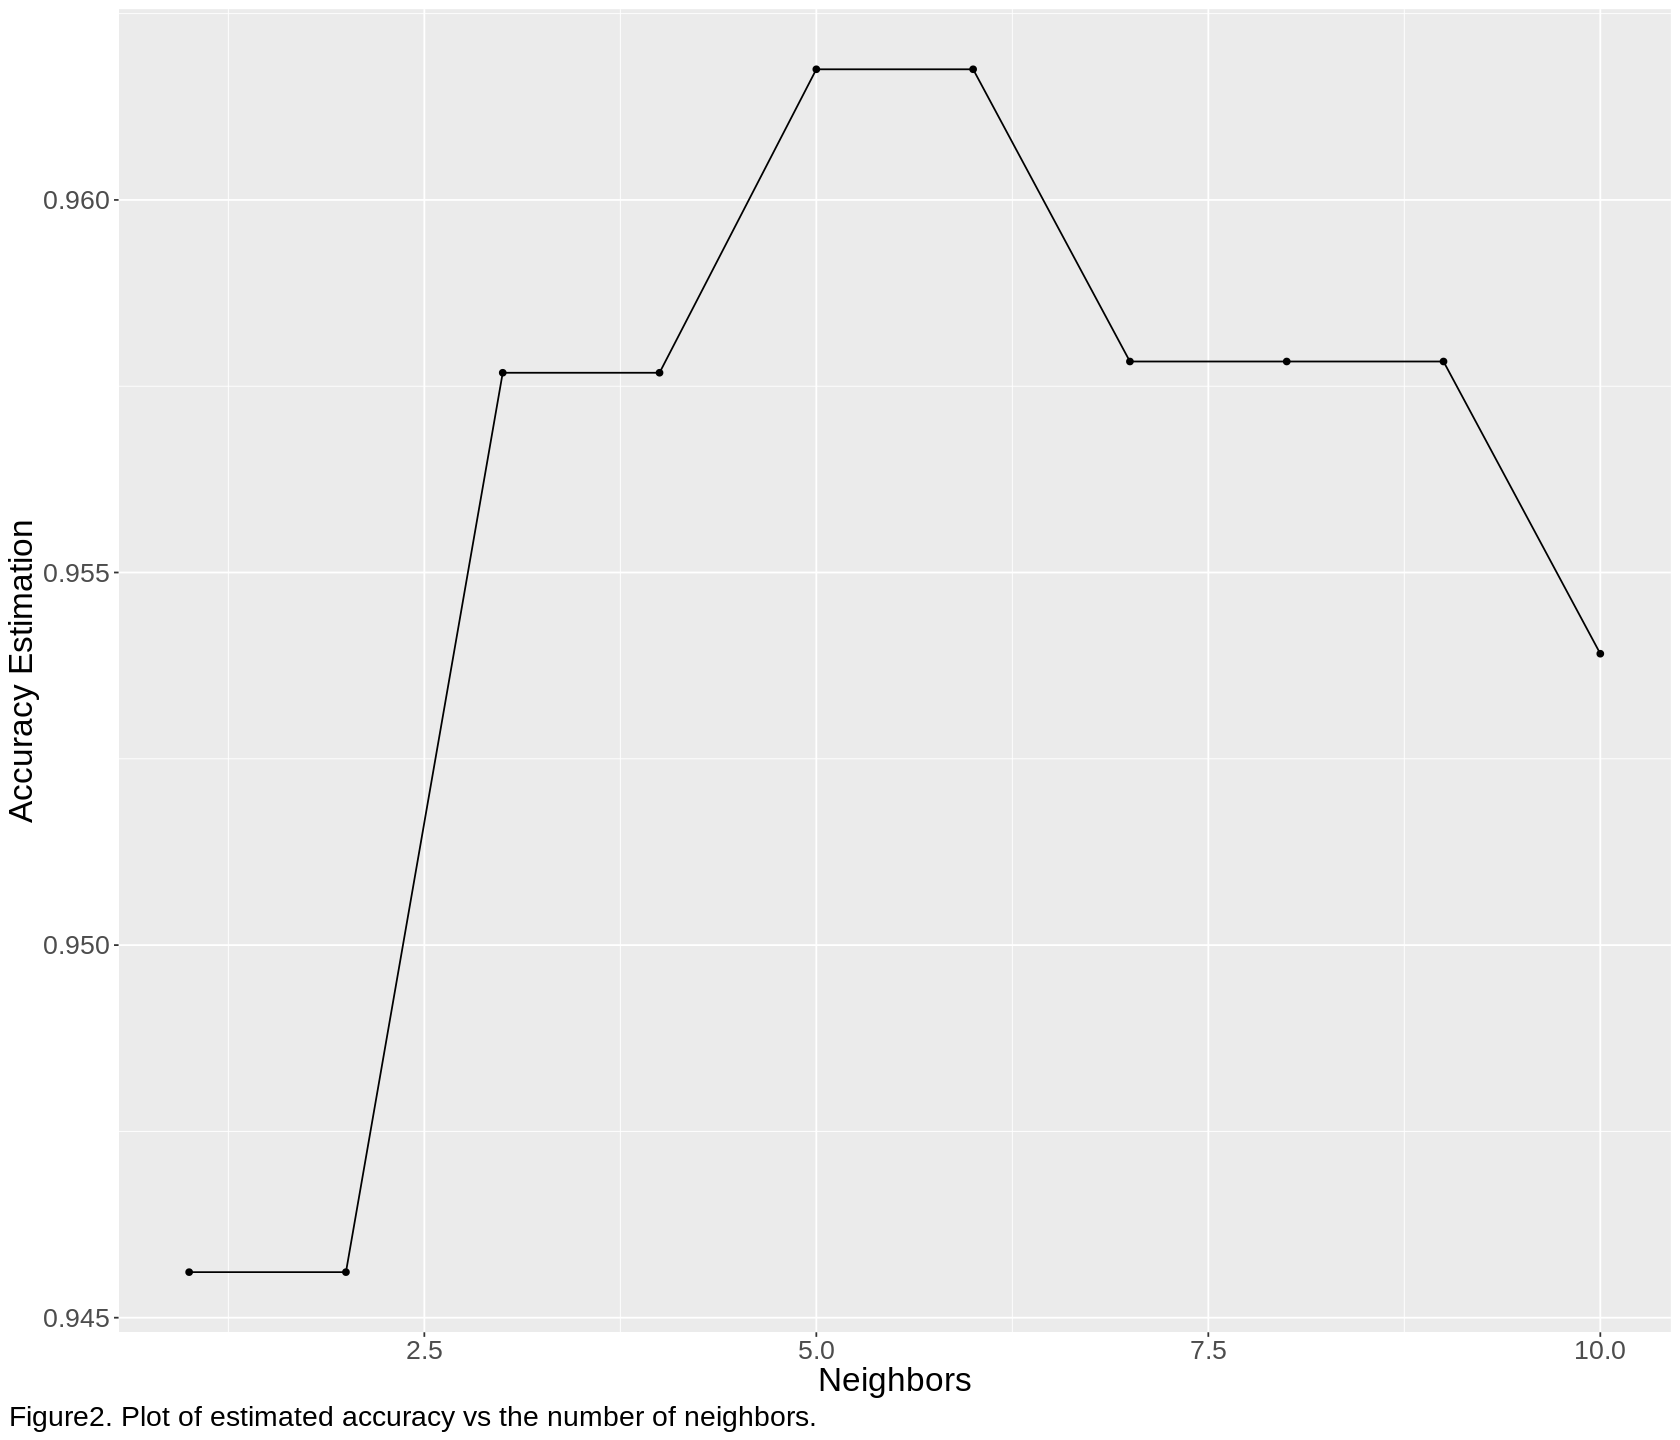

In [38]:
#Data analysis with PEG and LPR as the predictors for UNS

# create a recipe
data_recipe <- recipe(UNS ~ PEG + LPR, data = training_data) %>%
               step_scale(all_predictors()) %>%
               step_center(all_predictors())

# create k-nearest-neighbor model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

# perform 5-fold cross-validation
data_vfold <- vfold_cv(training_data, v = 5, strata = UNS)

# specify k_vals to tune
k_vals <- tibble(neighbors = seq(from = 1, to = 10))

# get the results
data_results <- workflow() %>%
                add_recipe(data_recipe) %>%
                add_model(knn_spec) %>%
                tune_grid(resamples = data_vfold, grid = k_vals) %>%
                collect_metrics()

# filter accuracy
accuracies <- data_results %>%
              filter(.metric == "accuracy")

# plot the accuracy versus k
accuracy_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                 geom_point() +
                 geom_line() +
                 labs(x = "Neighbors", y = "Accuracy Estimation", caption = "Figure2. Plot of estimated accuracy vs the number of neighbors.") +
                 theme(text = element_text(size = 20), plot.caption.position = "plot", plot.caption = element_text(size = 17, hjust = 0))
accuracy_plot

**According to the Figure2, the number of neighbors, k = 5 provides the highest accuracy (around 96.35%). Furthermore, estimated accuracy changes by only a small amount if we increase or decrease k near k = 5.  And finally, k = 5 does not create a prohibitively expensive computational cost of training. Considering all of these three points, we would like to select k = 3 for the classifier.**

In [12]:
## create the new knn classifier with the "best" of k
new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
                set_engine("kknn") %>%
                set_mode("classification")

## create a new wokflow
knn_fit <- workflow() %>%
           add_recipe(data_recipe) %>%
           add_model(new_knn_spec) %>%
           fit(data = training_data)

## evaluate our model by testing set
testing_data_predictions <- predict(knn_fit, testing_data) %>%
                            bind_cols(testing_data) %>%
                            metrics(truth = UNS, estimate = .pred_class)
testing_data_predictions

## check the accuracy
#test_prediction <- testing_data_predictions %>% 
#                   metrics(truth = UNS, estimate = .pred_class)
#test_prediction
## check the confusion matrix
test_confusion <- test_prediction %>%
                  conf_mat(truth = UNS, estimate = .pred_class)

ERROR: Error: In metric: `accuracy`
Problem with `summarise()` input `.estimate`.
[31m✖[39m `truth` and `estimate` levels must be equivalent.
`truth`: very_low, low, high, middle
`estimate`: very_low, high, low, middle

[34mℹ[39m Input `.estimate` is `metric_fn(truth = UNS, estimate = .pred_class, na_rm = na_rm)`.


## Citation
Dua, D. and Graff, C. (2019). <a href="http://archive.ics.uci.edu/ml" target="_blank">UCI Machine Learning Repository</a>. Irvine, CA: University of California, School of Information and Computer Science.

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.